In [495]:
import numpy as np
import pandas as pd
from data_access import CONNECTION_STRING
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [496]:
# read dataframe
df = pd.read_sql(
    "SELECT * FROM ohlc WHERE symbol = 'VRA-USDT' and interval = '30min' ORDER BY start_datetime",
    con=CONNECTION_STRING,
    index_col = 'start_datetime',
    parse_dates=True
)
#
df = pd.read_csv("Binance_EOSUSDT_1h.csv", skiprows=1, parse_dates=True, index_col='date').sort_values('date')

In [497]:
df = df.resample('D').last()

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2020-08-01 to 2021-09-07
Freq: D
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         403 non-null    int64  
 1   symbol       403 non-null    object 
 2   open         403 non-null    float64
 3   high         403 non-null    float64
 4   low          403 non-null    float64
 5   close        403 non-null    float64
 6   Volume EOS   403 non-null    float64
 7   Volume USDT  403 non-null    float64
 8   tradecount   403 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 31.5+ KB


In [499]:
df['SMA42'] = df['close'].rolling(15).mean()
df['SMA252'] = df['close'].rolling(70).mean()

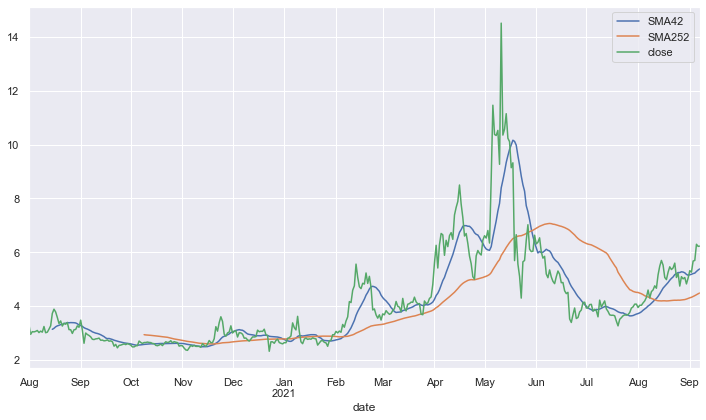

In [500]:
df[['SMA42', 'SMA252', 'close']].plot(figsize=(10,6))
plt.tight_layout()

The rule is to go long whenever the shorter SMA is
above the longer one and vice versa. For our purposes, we indicate a long position by 1
and a short position by –1.

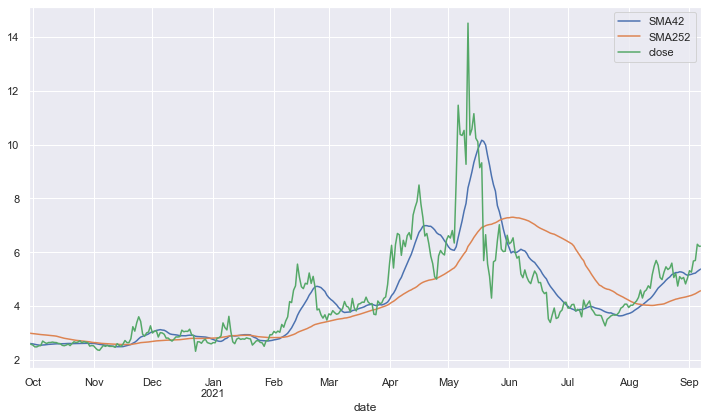

In [487]:
df['position'] = np.where(df['SMA42'] > df['SMA252'], 1, 0)
df.dropna(inplace=True)
df[['SMA42', 'SMA252', 'close']].plot(figsize=(10,6))
plt.tight_layout()

<AxesSubplot:title={'center':'MArket Positioning'}, xlabel='date'>

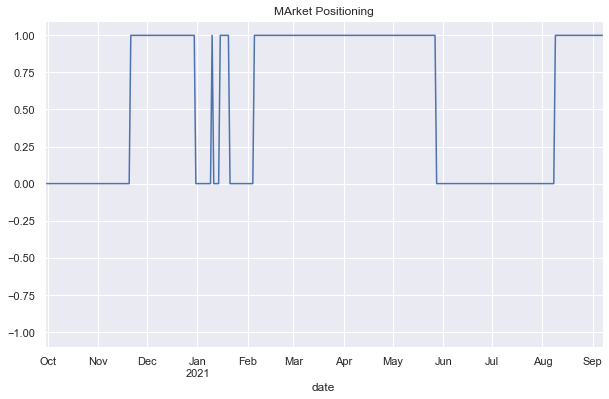

In [488]:
df['position'].plot(ylim=[-1.1, 1.1], title='MArket Positioning', figsize=(10,6))

In [489]:
 df['returns'] = np.log(df['close'] / df['close'].shift(1)) 

<AxesSubplot:>

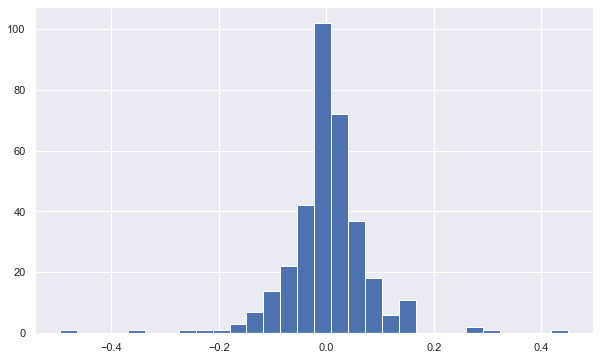

In [490]:
df['returns'].hist(bins=30 , figsize=(10,6 ))

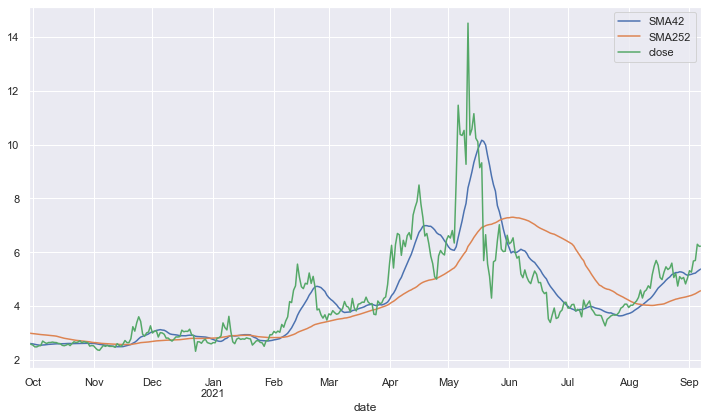

In [491]:
df[['SMA42', 'SMA252', 'close']].plot(figsize=(10,6))
plt.tight_layout()

In [492]:
df['strategy'] = df['position'].shift(1)*df['returns']

In [493]:
df[['strategy', 'returns']].sum().apply(np.exp)

strategy    1.637877
returns     2.394691
dtype: float64

<AxesSubplot:xlabel='date'>

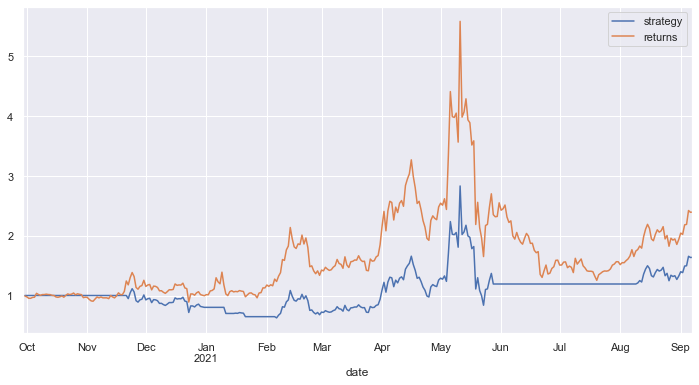

In [494]:
df[['strategy', 'returns']].cumsum().apply(np.exp).plot(figsize=(12,6))

# MOMENTUM

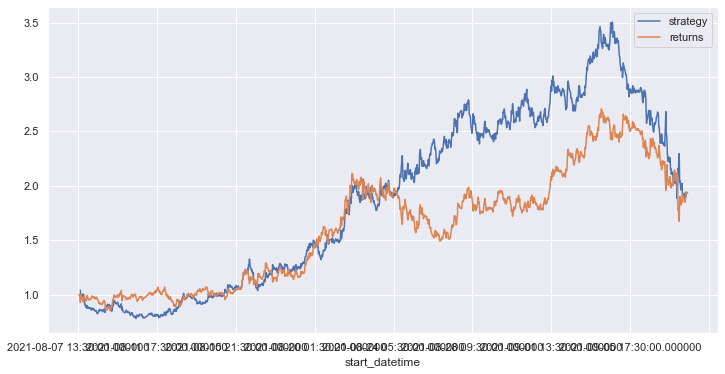

In [586]:
df = pd.read_sql(
    "SELECT * FROM ohlc WHERE symbol = 'VRA-USDT' and interval = '30min' ORDER BY start_datetime",
    con=CONNECTION_STRING,
    index_col = 'start_datetime',
    parse_dates=True
)

df['returns'] = np.log(df['close'] / df['close'].shift(1))
df['position'] = np.sign(df['returns'].rolling(4).mean())
df['strategy'] = df['position'].shift(1)*df['returns']
_ = df[['strategy', 'returns']].cumsum().apply(np.exp).plot(figsize=(12,6))

<AxesSubplot:xlabel='start_datetime'>

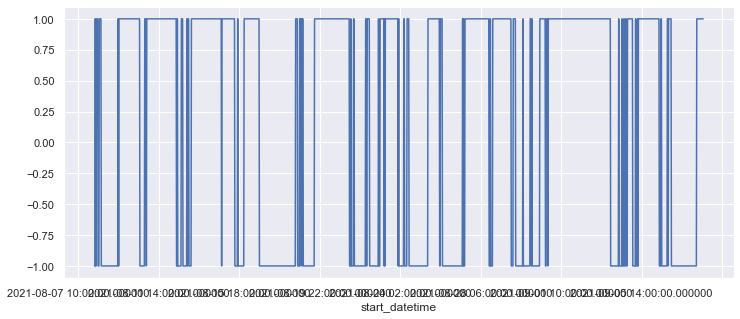

In [581]:
df['position'].plot(figsize=(12,5))

In [621]:
maxval = 0
for rolling_size in range(300):
    df = pd.read_csv("Binance_TRXUSDT_1h.csv", skiprows=1, parse_dates=True, index_col='date').sort_values('date')
    df.resample('D').last()
    df['returns'] = np.log(df['close'] / df['close'].shift(1))
    df['position'] = np.sign(df['returns'].rolling(rolling_size).mean())
    df['strategy'] = df['position'].shift(1)*df['returns']
#     _ = df[['strategy', 'returns']].cumsum().apply(np.exp).plot(figsize=(12,6))
    new_maxval = df['strategy'].cumsum().apply(np.exp).max()
    print(rolling_size)
    if new_maxval > maxval:
        maxval = new_maxval
        print(maxval)

0
1
1.107573982481287
2
3
4
1.603235197693345
5
1.8811168474257771
6
7
8
4.725887647996985
9
10
11
12
10.360000908628358
13
20.656385857309836
14
33.69204604595415
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
2

299


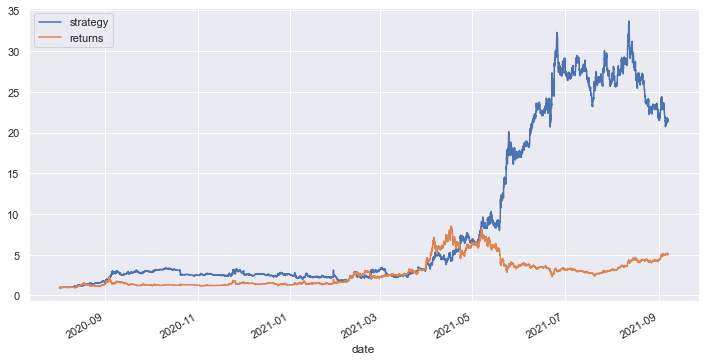

In [625]:
df = pd.read_csv("Binance_TRXUSDT_1h.csv", skiprows=1, parse_dates=True, index_col='date').sort_values('date')
df.resample('D').last()
df['returns'] = np.log(df['close'] / df['close'].shift(1))
df['position'] = np.sign(df['returns'].rolling(14).mean())
df['strategy'] = df['position'].shift(1)*df['returns']
fig = df[['strategy', 'returns']].cumsum().apply(np.exp).plot(figsize=(12,6))
new_maxval = df['strategy'].cumsum().apply(np.exp).max()
print(rolling_size)
if new_maxval > maxval:
    maxval = new_maxval
    print(maxval)

<ipython-input-633-fbdab0a319dd>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


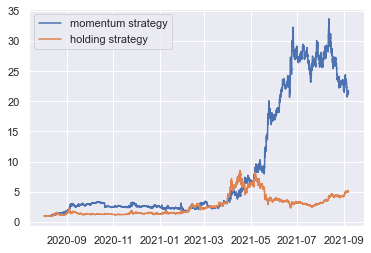

In [633]:
fig = plt.figure()
plt.plot(df['strategy'].cumsum().apply(np.exp), label='momentum strategy')
plt.plot(df['returns'].cumsum().apply(np.exp), label='holding strategy')
plt.legend()
fig.show()
fig.savefig("TRX-longterm.png")

<AxesSubplot:xlabel='date'>

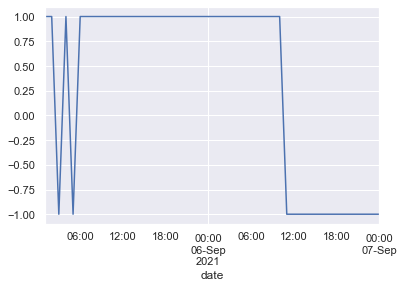

In [645]:
df['position'][-48:].plot()

In [641]:
df['strategy'].cumsum().apply(np.exp)

date
2020-08-01 23:00:00          NaN
2020-08-02 00:00:00          NaN
2020-08-02 01:00:00          NaN
2020-08-02 02:00:00          NaN
2020-08-02 03:00:00          NaN
                         ...    
2021-09-06 20:00:00    21.484448
2021-09-06 21:00:00    21.472023
2021-09-06 22:00:00    21.438961
2021-09-06 23:00:00    21.459613
2021-09-07 00:00:00    21.338337
Name: strategy, Length: 9610, dtype: float64

In [651]:
from pandas import Timestamp

In [652]:
Timestamp(2017, 1, 1, 12, 30, 50)

Timestamp('2017-01-01 12:30:50')

In [707]:
np.linspace(1,2,3) + 10


array([11. , 11.5, 12. ])

In [712]:
class LineTS:
    
    def __init__(self, start_timestamp, end_timestamp, start_y, end_y, freq='30min', shift=0):
        self.xs = pd.date_range(start=start_timestamp, end=end_timestamp, freq='30min')
        self.ys = np.linspace(start_y, end_y, len(xs)) + shift
        
    def to_df(self, col_name='value', index_name='start_datetime'):
        self.df = pd.DataFrame(data={col_name:self.ys}, index=self.xs)
        self.df.index.name = index_name
        return self.df
        
    def __str__(self):
        return str(self.xs) + "\n" + str(self.ys)
    

class LineSegmentTS:
    
    def __init__(self, timestamps, ys, freq='30min', shift=0):
        self.m = len(timestamps)
        self.lines = []
        for i in range(self.m-1):
            line = LineTS(timestamps[i], timestamps[i+1], ys[i], ys[i+1], freq=freq, shift=shift)
            self.lines.append(line)
            print(line)
            
    def to_df(self, col_name='value', index_name='start_datetime'):
        list_of_dfs = []
        for index, line in enumerate(self.lines):
            if index == self.m-1:
                list_of_dfs.append(line.to_df())
            else:
                list_of_dfs.append(line.to_df()[:-1])
        return pd.concat(list_of_dfs)
        
                              

line_seg = LineSegmentTS([df.index[5], df.index[7], df.index[9]], [10,20,40])
line_seg.to_df()

DatetimeIndex(['2020-08-02 04:00:00', '2020-08-02 04:30:00',
               '2020-08-02 05:00:00', '2020-08-02 05:30:00',
               '2020-08-02 06:00:00'],
              dtype='datetime64[ns]', freq='30T')
[10.  12.5 15.  17.5 20. ]
DatetimeIndex(['2020-08-02 06:00:00', '2020-08-02 06:30:00',
               '2020-08-02 07:00:00', '2020-08-02 07:30:00',
               '2020-08-02 08:00:00'],
              dtype='datetime64[ns]', freq='30T')
[20. 25. 30. 35. 40.]


,value
start_datetime,
2020-08-02 04:00:00,10.0
2020-08-02 04:30:00,12.5
2020-08-02 05:00:00,15.0
2020-08-02 05:30:00,17.5
2020-08-02 06:00:00,20.0
2020-08-02 06:30:00,25.0
2020-08-02 07:00:00,30.0
2020-08-02 07:30:00,35.0


In [701]:
line_seg = LineSegmentTS(df.index.to_list()[:2], df['close'].to_list()[:2], freq='30min')

In [702]:
df['close'].to_list()[:10]

[0.02046,
 0.02062,
 0.02092,
 0.02102,
 0.02124,
 0.01917,
 0.01904,
 0.01929,
 0.01958,
 0.01935]

In [703]:
df.index.to_list()[:10]

[Timestamp('2020-08-01 23:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-02 01:00:00'),
 Timestamp('2020-08-02 02:00:00'),
 Timestamp('2020-08-02 03:00:00'),
 Timestamp('2020-08-02 04:00:00'),
 Timestamp('2020-08-02 05:00:00'),
 Timestamp('2020-08-02 06:00:00'),
 Timestamp('2020-08-02 07:00:00'),
 Timestamp('2020-08-02 08:00:00')]

In [705]:
print(line_seg.lines[0])

DatetimeIndex(['2020-08-01 23:00:00', '2020-08-01 23:30:00',
               '2020-08-02 00:00:00'],
              dtype='datetime64[ns]', freq='30T')
[0.02046 0.0205  0.02054 0.02058 0.02062]


In [713]:
from sklearn.linear_model import LinearRegression
X = np.array([[1], [2], [3], [4]])
y = np.dot(X, np.array([5])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
# reg.coef_
# array([1., 2.])
# >>> reg.intercept_
# 3.0...
reg.predict(np.array([[3],[4]]))
# array([16.])

array([18., 23.])

In [729]:
start_index = 5
end_index = 7

reg = LinearRegression().fit( [[5], [7]] , [df['low'].iloc[5], df['low'].iloc[7]] )
reg.score( [[5], [7]] , [df['low'].iloc[5], df['low'].iloc[7]])

1.0

In [793]:
def generate_timestamps(timestamps=[], freq='30min'):
    m = len(timestamps)
    diff_list = [1]
    for index in range(m-1):
        dates = pd.date_range(start=timestamps[index], end=timestamps[index+1], freq=freq)
        diff_list.append(len(dates))
    return pd.date_range(start=timestamps[0], end=timestamps[-1], freq=freq), diff_list
        
generate_timestamps(timestamps=[df.index[5], df.index[7], df.index[10], df.index[15]], freq='1H')

(DatetimeIndex(['2020-08-02 04:00:00', '2020-08-02 05:00:00',
                '2020-08-02 06:00:00', '2020-08-02 07:00:00',
                '2020-08-02 08:00:00', '2020-08-02 09:00:00',
                '2020-08-02 10:00:00', '2020-08-02 11:00:00',
                '2020-08-02 12:00:00', '2020-08-02 13:00:00',
                '2020-08-02 14:00:00'],
               dtype='datetime64[ns]', freq='H'),
 [1, 3, 4, 6])

In [1124]:
df = pd.read_sql(
    """SELECT * FROM ohlc
        JOIN candlestick
        ON ohlc.id = candlestick.ohlc_id
    WHERE symbol = 'VRA-USDT' and interval = '30min' ORDER BY start_datetime""",
    con=CONNECTION_STRING,
    index_col = 'start_datetime',
    parse_dates=True
)
df.index = pd.to_datetime(df.index)
df['min_o1'] = df['min_o1'].astype('bool')




reg_ts = RegressionTimeStampsTS(df, bool_filter_col='min_o1', objective_col='low', train_data_size=3, freq='30min')
reg_ts.fit_interpolate_extraploate()
        

start_datetime
2021-08-07 13:30:00    0.016838
2021-08-07 14:00:00    0.016755
2021-08-07 14:30:00    0.016671
2021-08-07 15:00:00    0.017340
2021-08-07 15:30:00    0.017257
                         ...   
2021-09-08 18:30:00    0.034765
2021-09-08 19:00:00    0.034673
2021-09-08 19:30:00    0.034581
2021-09-08 20:00:00    0.034489
2021-09-08 20:30:00    0.034396
Name: reg_pred, Length: 1551, dtype: float64

In [1096]:
np.array(list(regression_dict.keys())).max()

Timestamp('2021-09-08 20:30:00', freq='30T')

start_datetime
2021-09-08 16:00:00    0.034196
2021-09-08 16:30:00    0.034259
2021-09-08 17:00:00    0.034322
2021-09-08 17:30:00    0.034950
2021-09-08 18:00:00    0.034858
2021-09-08 18:30:00    0.034765
2021-09-08 19:00:00    0.034673
2021-09-08 19:30:00    0.034581
2021-09-08 20:00:00    0.034489
2021-09-08 20:30:00    0.034489
Name: min_ol_low_3, dtype: float64

In [1029]:
other_df.index.min()

Timestamp('2021-08-07 18:00:00', freq='30T')

In [848]:
n_train = 3
df['min_o1'] = df['low']>0.16
df['min_o1_lr_3'] = np.nan

# indexes_list = indexes.to_list()
# df['low'].loc[indexes]
# for index, row in enumerate(indexes_list):
#     if index < 2:
#         continue
#     indexes_now = indexes[index-2:index+1]
#     generate_timestamps(indexes)
#     print((indexes_now[2] - indexes_now[1]).Hour)
#     print(indexes_now)

In [775]:
li = pd.date_range('2012-01-02', '2012-01-05', freq='D')
li2 = pd.date_range('2012-01-05', '2012-01-07', freq='D')

In [790]:
li

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05'], dtype='datetime64[ns]', freq='D')

In [743]:
df[df['low']>0.16].index

DatetimeIndex(['2021-04-15 23:00:00', '2021-04-16 17:00:00',
               '2021-04-16 21:00:00', '2021-04-17 00:00:00',
               '2021-04-17 01:00:00', '2021-04-17 02:00:00',
               '2021-04-17 03:00:00', '2021-04-17 04:00:00',
               '2021-04-17 05:00:00', '2021-04-17 06:00:00',
               '2021-04-17 07:00:00', '2021-04-17 08:00:00',
               '2021-04-17 09:00:00', '2021-04-17 10:00:00',
               '2021-04-17 12:00:00', '2021-04-17 13:00:00',
               '2021-04-17 14:00:00', '2021-05-07 01:00:00',
               '2021-05-07 09:00:00', '2021-05-07 10:00:00',
               '2021-05-07 11:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
indexes = []
timestamps = [df.index[5], df.index[7]]


In [732]:
reg.predict([[5], [6], [7], [8], [9] , [10]
            ])

array([0.0175  , 0.018215, 0.01893 , 0.019645, 0.02036 , 0.021075])

In [734]:
def fit_linear_models(df):
    if df['low'] ==
    df['min_o1_lr_3'] = np.nan
    return df
    
fit_linear_models(df)

,unix,symbol,open,high,low,close,Volume TRX,Volume USDT,tradecount,returns,position,strategy,min_o1_lr_3
date,,,,,,,,,,,,,
2020-08-01 23:00:00,1596322800000,TRX/USDT,0.02052,0.02056,0.02044,0.02046,36184603.1,7.416537e+05,1452,NaN,NaN,NaN,NaN
2020-08-02 00:00:00,1596326400000,TRX/USDT,0.02047,0.02068,0.02042,0.02062,62932273.0,1.293902e+06,2251,0.007790,NaN,NaN,NaN
2020-08-02 01:00:00,1596330000000,TRX/USDT,0.02061,0.02110,0.02060,0.02092,101421211.2,2.121717e+06,4024,0.014444,NaN,NaN,NaN
2020-08-02 02:00:00,1596333600000,TRX/USDT,0.02094,0.02110,0.02063,0.02102,61786777.5,1.290442e+06,2652,0.004769,NaN,NaN,NaN
2020-08-02 03:00:00,1596337200000,TRX/USDT,0.02102,0.02135,0.02086,0.02124,86432479.2,1.827874e+06,3856,0.010412,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-06 20:00:00,1630958400000,TRX/USDT,0.10300,0.10370,0.10266,0.10369,22185180.8,2.289532e+06,5782,0.006580,-1.0,-0.006580,NaN
2021-09-06 21:00:00,1630962000000,TRX/USDT,0.10369,0.10379,0.10342,0.10375,19287920.7,1.998819e+06,5019,0.000578,-1.0,-0.000578,NaN
2021-09-06 22:00:00,1630965600000,TRX/USDT,0.10375,0.10420,0.10357,0.10391,30112787.9,3.129736e+06,7464,0.001541,-1.0,-0.001541,NaN


In [1078]:
df.to_dict(orient='columns')

ValueError: orient 'columns' not understood

In [1125]:
from api_access import KucoinClient
from kucoin import 

In [1126]:
client = KucoinClient()
client.SIDE_BUY

In [1131]:
client.get_24hr_stats('ADA-USDT')

{'time': 1631194910996,
 'symbol': 'ADA-USDT',
 'buy': '2.583289',
 'sell': '2.58385',
 'changeRate': '0.0775',
 'changePrice': '0.185922',
 'high': '2.622126',
 'low': '2.34444',
 'vol': '41119047.4050213',
 'volValue': '101915571.45677071453602',
 'last': '2.583197',
 'averagePrice': '2.39486453',
 'takerFeeRate': '0.001',
 'makerFeeRate': '0.001',
 'takerCoefficient': '1',
 'makerCoefficient': '1'}

In [1140]:
order = client.create_limit_order('ADA-USDT', client.SIDE_BUY, '10', '2.0')

KucoinAPIException: KucoinAPIException 400003: KC-API-KEY not exists

In [1134]:
client.get_deposits()

KucoinAPIException: KucoinAPIException 400004: Invalid KC-API-PASSPHRASE

In [1137]:
from kucoin.client import Client

In [1139]:
client = Client('6134d0d668e70400067261d9' , 'd0, ', 'ef')

In [1147]:
df[-1:]['high'].values[0]

0.03554887

['ADA-BTC', 'ADA-USDT', 'FTM-BTC', 'FTM-USDT', 'TRX-USDT', 'VRA-USDT']